In [1]:
import numpy as np
from time import time
import matplotlib
import sys
# the following will prevent the figure from popping up
matplotlib.use('Agg')
from matplotlib import pyplot as plt
def simple_mandelbrot(width, height, real_low, real_high, imag_low, imag_high, max_iters, upper_bound):
    
     real_vals = np.linspace(real_low, real_high, width)
     imag_vals = np.linspace(imag_low, imag_high, height)
        
     # we will represent members as 1, non-members as 0.
    
     mandelbrot_graph = np.ones((height,width), dtype=np.float32)
    
     for x in range(width):
        
         for y in range(height):
            
             c = np.complex64( real_vals[x] + imag_vals[y] * 1j  )           
             z = np.complex64(0)
            
             for i in range(max_iters):
                
                 z = z**2 + c
                
                 if(np.abs(z) > upper_bound):
                     mandelbrot_graph[y,x] = 0
                     break
                
     return mandelbrot_graph

In [2]:
t1 = time()
#mandel = simple_mandelbrot(512,512,-2,2,-2,2,256)
gpu_mandel = simple_mandelbrot(5,5,-2,2,-2,2,10,16)
t2 = time()
mandel_time = t2 - t1
print(gpu_mandel)
t1 = time()
fig = plt.figure(1)
plt.imshow(gpu_mandel, extent=(-2, 2, -2, 2))
#plt.savefig('mandelbrot.png', dpi=fig.dpi)
t2 = time()
    
dump_time = t2 - t1
    
print 'It took {} seconds to calculate the Mandelbrot graph.'.format(mandel_time)
print 'It took {} seconds to dump the image.'.format(dump_time)

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 1.  1.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
It took 0.00317907333374 seconds to calculate the Mandelbrot graph.
It took 0.0409219264984 seconds to dump the image.


In [4]:
print('It took {} seconds to calculate the Mandelbrot graph.'.format(mandel_time))
#print 'It took {} seconds to dump the image.'.format(dump_time)

It took 0.00321412086487 seconds to calculate the Mandelbrot graph.


In [5]:
print('test')

test


In [2]:
import pycuda
import pycuda.driver as drv
drv.init()

print 'CUDA device query (PyCUDA version) \n'

print 'Detected {} CUDA Capable device(s) \n'.format(drv.Device.count())

for i in range(drv.Device.count()):
    
    gpu_device = drv.Device(i)
    print 'Device {}: {}'.format( i, gpu_device.name() ) 
    compute_capability = float( '%d.%d' % gpu_device.compute_capability() )
    print '\t Compute Capability: {}'.format(compute_capability)
    print '\t Total Memory: {} megabytes'.format(gpu_device.total_memory()//(1024**2))
    
    # The following will give us all remaining device attributes as seen 
    # in the original deviceQuery.
    # We set up a dictionary as such so that we can easily index
    # the values using a string descriptor.
    
    device_attributes_tuples = gpu_device.get_attributes().iteritems() 
    device_attributes = {}
    
    for k, v in device_attributes_tuples:
        device_attributes[str(k)] = v
    
    num_mp = device_attributes['MULTIPROCESSOR_COUNT']
    
    # Cores per multiprocessor is not reported by the GPU!  
    # We must use a lookup table based on compute capability.
    # See the following:
    # http://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#compute-capabilities
    
    cuda_cores_per_mp = { 5.0 : 128, 5.1 : 128, 5.2 : 128, 5.3 : 128,6.0 : 64, 6.1 : 128, 6.2 : 128}[compute_capability]
    
    print '\t ({}) Multiprocessors, ({}) CUDA Cores / Multiprocessor: {} CUDA Cores'.format(num_mp, cuda_cores_per_mp, num_mp*cuda_cores_per_mp)
    
    device_attributes.pop('MULTIPROCESSOR_COUNT')
    
    for k in device_attributes.keys():
        print '\t {}: {}'.format(k, device_attributes[k])

SyntaxError: invalid syntax (<ipython-input-2-98060d8e791e>, line 5)

In [1]:
%env PATH=/usr/local/cuda/bin:/usr/local/cuda/bin:/home/aeg/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin
%env LD_LIBRARY_PATH=/usr/local/cuda/lib64

env: PATH=/usr/local/cuda/bin:/usr/local/cuda/bin:/home/aeg/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin
env: LD_LIBRARY_PATH=/usr/local/cuda/lib64


In [8]:
import numpy as np
import pycuda.autoinit
from pycuda import gpuarray
host_data = np.array([1,3,5,7,9,11],dtype=np.float32)
device_data = gpuarray.to_gpu(host_data)
device_data_x2 = 3*device_data
host_data_x2 = device_data_x2.get()
print(host_data_x2)

[  3.   9.  15.  21.  27.  33.]


In [9]:
%env

{'CLICOLOR': '1',
 'DBUS_SESSION_BUS_ADDRESS': 'unix:path=/run/user/1000/bus',
 'GIT_PAGER': 'cat',
 'HOME': '/home/aeg',
 'JETSON_BOARD': 'P3449-0000',
 'JETSON_BOARDIDS': '3448',
 'JETSON_CHIP_ID': '33',
 'JETSON_CODENAME': 'porg',
 'JETSON_CUDA': '10.2.89',
 'JETSON_CUDA_ARCH_BIN': '5.3',
 'JETSON_CUDNN': '8.0.0.180',
 'JETSON_JETPACK': '4.4.1',
 'JETSON_L4T': '32.4.4',
 'JETSON_L4T_RELEASE': '32',
 'JETSON_L4T_REVISION': '4.4',
 'JETSON_MACHINE': 'NVIDIA Jetson Nano (Developer Kit Version)',
 'JETSON_MODULE': 'P3448-0000',
 'JETSON_OPENCV': '4.1.1',
 'JETSON_OPENCV_CUDA': 'NO',
 'JETSON_SERIAL_NUMBER': '1422819075558',
 'JETSON_SOC': 'tegra210',
 'JETSON_TENSORRT': '7.1.3.0',
 'JETSON_TYPE': 'Nano (Developer Kit Version)',
 'JETSON_VISIONWORKS': '1.6.0.501',
 'JETSON_VPI': '0.4.4',
 'JETSON_VULKAN_INFO': '1.2.70',
 'JPY_PARENT_PID': '10872',
 'LANG': 'en_US.UTF-8',
 'LC_ADDRESS': 'tr_TR.UTF-8',
 'LC_IDENTIFICATION': 'tr_TR.UTF-8',
 'LC_MEASUREMENT': 'tr_TR.UTF-8',
 'LC_MONETARY': '

In [10]:
import numpy as np
import pycuda.autoinit
from pycuda import gpuarray
from time import time
host_data = np.float32( np.random.random(50000000) )

t1 = time()
host_data_2x =  host_data * np.float32(2)
t2 = time()

print 'total time to compute on CPU: %f' % (t2 - t1)
device_data = gpuarray.to_gpu(host_data)

t1 = time()
device_data_2x =  device_data * np.float32( 2 )
t2 = time()

from_device = device_data_2x.get()
print 'total time to compute on GPU: %f' % (t2 - t1)

print 'Is the host computation the same as the GPU computation? : {}'.format(np.allclose(from_device, host_data_2x) )

total time to compute on CPU: 0.159297
total time to compute on GPU: 0.119669
Is the host computation the same as the GPU computation? : True


In [11]:
with open('time_calc0.py','r') as f:
     time_calc_code = f.read()

In [12]:
%prun -s cumulative exec(time_calc_code)

total time to compute on CPU: 0.191219
total time to compute on GPU: 0.289821
Is the host computation the same as the GPU computation? : True
 

         272 function calls in 4.270 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    4.892    4.892 <string>:1(<module>)
        1    0.010    0.010    1.833    1.833 numeric.py:2397(allclose)
        1    0.258    0.258    1.808    1.808 numeric.py:2463(isclose)
        1    1.642    1.642    1.642    1.642 {method 'random_sample' of 'mtrand.RandomState' objects}
        1    1.009    1.009    1.523    1.523 numeric.py:2522(within_tol)
        2    0.514    0.257    0.514    0.257 {abs}
        2    0.456    0.228    0.456    0.228 gpuarray.py:1231(_memcpy_discontig)
        1    0.000    0.000    0.381    0.381 gpuarray.py:1047(to_gpu)
        2    0.337    0.168    0.337    0.168 gpuarray.py:162(__init__)
        1    0.000    0.000    0.231    0.231 gpuarray.py:265(get)
        1    0.000    0.000    0.226    0.226 gpuarray.py:230(set)
        1    0.000    0.000    0.181    0.181 gpuarr

In [13]:
import numpy as np
import pycuda.autoinit
from pycuda import gpuarray
from time import time
from pycuda.elementwise import ElementwiseKernel
host_data = np.float32( np.random.random(50000000) )
gpu_2x_ker = ElementwiseKernel(
"float *in, float *out",
"out[i] = 2*in[i];",
"gpu_2x_ker")

In [ ]:
def speedcomparison():
    t1 = time()
    host_data_2x =  host_data * np.float32(2)
    t2 = time()
    print 'total time to compute on CPU: %f' % (t2 - t1)
    device_data = gpuarray.to_gpu(host_data)
    # allocate memory for output
    device_data_2x = gpuarray.empty_like(device_data)
    t1 = time()
    gpu_2x_ker(device_data, device_data_2x)
    t2 = time()
    from_device = device_data_2x.get()
    print 'total time to compute on GPU: %f' % (t2 - t1)
    print 'Is the host computation the same as the GPU computation? : {}'.format(np.allclose(from_device, host_data_2x) )

if __name__ == '__main__':
    speedcomparison()

In [ ]:
mandel_ker = ElementwiseKernel(
"pycuda::complex<float> *lattice, float *mandelbrot_graph, int max_iters, float upper_bound",
"""
mandelbrot_graph[i] = 1;
pycuda::complex<float> c = lattice[i]; 
pycuda::complex<float> z(0,0);
for (int j = 0; j < max_iters; j++)
    {  
     z = z*z + c;
     if(abs(z) > upper_bound)
         {
          mandelbrot_graph[i] = 0;
          break;
         }
    }         
""",
"mandel_ker")

In [ ]:
def gpu_mandelbrot(width, height, real_low, real_high, imag_low, imag_high, max_iters, upper_bound):
    real_vals = np.matrix(np.linspace(real_low, real_high, width), dtype=np.complex64)
    imag_vals = np.matrix(np.linspace( imag_high, imag_low, height), dtype=np.complex64) * 1j
    mandelbrot_lattice = np.array(real_vals + imag_vals.transpose(), dtype=np.complex64)
    print(mandelbrot_lattice)
    print 'Array shape:{}.'.format(mandelbrot_lattice.shape)
    # copy complex lattice to the GPU
    mandelbrot_lattice_gpu = gpuarray.to_gpu(mandelbrot_lattice)    
    # allocate an empty array on the GPU
    mandelbrot_graph_gpu = gpuarray.empty(shape=mandelbrot_lattice.shape, dtype=np.float32)
    #mandelbrot_graph_host =np.ones_like(mandelbrot_lattice,dtype=np.float32)
    #mandelbrot_graph_gpu = gpuarray.to_gpu(mandelbrot_graph_host)
    #print(mandelbrot_graph_host)
    mandel_ker( mandelbrot_lattice_gpu, mandelbrot_graph_gpu, np.int32(max_iters), np.float32(upper_bound))          
    mandelbrot_graph = mandelbrot_graph_gpu.get()
    return mandelbrot_graph

In [ ]:
#import numpy as np
#from time import time
#import matplotlib
#import sys
#from matplotlib import pyplot as plt
# the following will prevent the figure from popping up
matplotlib.use('Agg')
t1 = time()
#gpu_mandel = gpu_mandelbrot(5,5,-2,2,-2,2,10,16)
gpu_mandel = gpu_mandelbrot(1024,1024,-2,2,-2,2,256, 2)
t2 = time()
mandel_time = t2 - t1
t1 = time()

fig = plt.figure(1)
plt.imshow(gpu_mandel, extent=(-2, 2, -2, 2))
print(gpu_mandel)
plt.savefig('gpu_mandelbrot.png', dpi=fig.dpi)
t2 = time()
dump_time = t2 - t1

print 'It took {} seconds to calculate the Mandelbrot graph.'.format(mandel_time)
print 'It took {} seconds to dump the image.'.format(dump_time)    


In [ ]:
import numpy as np
import pycuda.autoinit
from pycuda import gpuarray
from pycuda.scan import InclusiveScanKernel
seq = np.array([1,2,3,4],dtype=np.int32)
seq_gpu = gpuarray.to_gpu(seq)
sum_gpu = InclusiveScanKernel(np.int32, "a+b")
print sum_gpu(seq_gpu).get()
print np.cumsum(seq)

In [ ]:
import numpy as np
import pycuda.autoinit
from pycuda import gpuarray
from pycuda.scan import InclusiveScanKernel
seq = np.array([1,100,-3,-10000, 4, 10000, 66, 14, 21],dtype=np.int32)
seq_gpu = gpuarray.to_gpu(seq)
max_gpu = InclusiveScanKernel(np.int32, "a > b ? a : b")
#print max_gpu(seq_gpu).get()[-1]
print max_gpu(seq_gpu).get()
print np.max(seq)

In [ ]:
from pycuda.reduction import ReductionKernel
dot_prod = ReductionKernel(np.float32, neutral="0", reduce_expr="a+b", map_expr="vec1[i]*vec2[i]", arguments="float *vec1, float *vec2")

In [ ]:
#complex_absolute_compare = ReductionKernel(np.complex64, neutral="0", reduce_expr="abs(a) > abs(b) ? a : b", 
#map_expr="""
#pycuda::complex<float> first = vec3[i]; 
#pycuda::complex<float> second = vec4[i];
#return_vec[i] = first;
#if(abs(first) < abs(second))
#         {
#          return_vec[i] = second;
#         }
#    } 
#
#""",arguments="pycuda::complex<float> *vec3, pycuda::complex<float> *vec4,pycuda::complex<float> *return_vec")

In [ ]:
complex_absolute_compare = ReductionKernel(np.float32, neutral="0", reduce_expr="a*a > b*b ? a : b", map_expr="vec1[i]*vec1[i] > vec2[i]*vec2[i] ? vec1[i] : vec2[i]", arguments="float *vec1, float *vec2")

In [ ]:
def gpu_absolute_compare(width, real_low, real_high, imag_low, imag_high):
    real_vals = np.matrix(np.linspace(real_low, real_high, width), dtype=np.float32)
    imag_vals = np.matrix(np.linspace( imag_high, imag_low, width), dtype=np.float32)
    real_vals_array_gpu = gpuarray.to_gpu(real_vals)
    imag_vals_array_gpu = gpuarray.to_gpu(imag_vals)
    res = complex_absolute_compare( real_vals_array_gpu, imag_vals_array_gpu).get()  
    print(res)

In [ ]:
gpu_absolute_compare(2048,-2,2,0,5)

In [ ]:
import pycuda.autoinit
import pycuda.driver as drv
import numpy as np
from pycuda import gpuarray
from pycuda.compiler import SourceModule
ker = SourceModule("""
__global__ void scalar_multiply_kernel(float *outvec, float scalar, float *vec)
{
 int i = threadIdx.x;
 outvec[i] = scalar*vec[i];
}
""")

In [ ]:
scalar_multiply_gpu = ker.get_function("scalar_multiply_kernel")
testvec = np.random.randn(512).astype(np.float32)
testvec_gpu = gpuarray.to_gpu(testvec)
outvec_gpu = gpuarray.empty_like(testvec_gpu)
scalar_multiply_gpu( outvec_gpu, np.float32(2), testvec_gpu, block=(512,1,1), grid=(1,1,1))
print "Does our kernel work correctly? : {}".format(np.allclose(outvec_gpu.get() , 2*testvec) )

In [8]:
#%matplotlib widget
import matplotlib
import pycuda.autoinit
import pycuda.driver as drv
from pycuda import gpuarray
from pycuda.compiler import SourceModule
import numpy as np
#import matplotlib.backends.backend_tkagg
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, PillowWriter
matplotlib.use("Agg")
ker = SourceModule("""
#define _X  ( threadIdx.x + blockIdx.x * blockDim.x )
#define _Y  ( threadIdx.y + blockIdx.y * blockDim.y )
#define _WIDTH  ( blockDim.x * gridDim.x )
#define _HEIGHT ( blockDim.y * gridDim.y  )
#define _XM(x)  ( (x + _WIDTH) % _WIDTH )
#define _YM(y)  ( (y + _HEIGHT) % _HEIGHT )
#define _INDEX(x,y)  ( _XM(x)  + _YM(y) * _WIDTH )
// return the number of living neighbors for a given cell                
__device__ int nbrs(int x, int y, int * in)
{
     return ( in[ _INDEX(x -1, y+1) ] + in[ _INDEX(x-1, y) ] + in[ _INDEX(x-1, y-1) ] \
                   + in[ _INDEX(x, y+1)] + in[_INDEX(x, y - 1)] \
                   + in[ _INDEX(x+1, y+1) ] + in[ _INDEX(x+1, y) ] + in[ _INDEX(x+1, y-1) ] );
}
__global__ void conway_ker(int * lattice_out, int * lattice  )
{
   // x, y are the appropriate values for the cell covered by this thread
   int x = _X, y = _Y;
   
   // count the number of neighbors around the current cell
   int n = nbrs(x, y, lattice);
                   
    
    // if the current cell is alive, then determine if it lives or dies for the next generation.
    if ( lattice[_INDEX(x,y)] == 1)
       switch(n)
       {
          // if the cell is alive: it remains alive only if it has 2 or 3 neighbors.
          case 2:
          case 3: lattice_out[_INDEX(x,y)] = 1;
                  break;
          default: lattice_out[_INDEX(x,y)] = 0;                   
       }
    else if( lattice[_INDEX(x,y)] == 0 )
         switch(n)
         {
            // a dead cell comes to life only if it has 3 neighbors that are alive.
            case 3: lattice_out[_INDEX(x,y)] = 1;
                    break;
            default: lattice_out[_INDEX(x,y)] = 0;         
         }
         
}
""")

In [4]:
conway_ker = ker.get_function("conway_ker")    
def update_gpu(frameNum, img, newLattice_gpu, lattice_gpu, N):
    conway_ker(  newLattice_gpu, lattice_gpu, grid=(N/32,N/32,1), block=(32,32,1)   ) 
    img.set_data(newLattice_gpu.get() )
    lattice_gpu[:] = newLattice_gpu[:] 
    return img

In [46]:
N = 128
lattice = np.int32( np.random.choice([1,0], N*N, p=[0.25, 0.75]).reshape(N, N) )
lattice_gpu = gpuarray.to_gpu(lattice)
newLattice_gpu = gpuarray.empty_like(lattice_gpu)        
fig, ax = plt.subplots()
img = ax.imshow(lattice_gpu.get(), interpolation='nearest')
#ani = FuncAnimation(fig, update_gpu, fargs=(img, newLattice_gpu, lattice_gpu, N, ) , interval=0, frames=1000, 0)    
#ani = FuncAnimation(fig=fig, func =update_gpu, fargs=(img, newLattice_gpu, lattice_gpu, N, ), interval=40, frames=np.arange(0, 1000))
ani = animation.FuncAnimation(fig, update_gpu, fargs=(img, newLattice_gpu, lattice_gpu, N, ) , interval=40, frames=1000, save_count=1000)   
#plt.show()
#plt.savefig('conway.png', dpi=fig.dpi)

In [47]:
np.arange(0, 1000)[0]

0

In [48]:
#matplotlib.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
#matplotlib.rcParams['animation.convert_path'] = '/usr/bin/convert'
#ani.save("conway.gif", writer=PillowWriter())
Writer = animation.writers['ffmpeg']
writer = Writer(fps = 10, bitrate = -1)
ani.save('ani_test.mp4', writer = writer)

In [1]:
import pycuda.autoinit
import pycuda.driver as drv
from pycuda import gpuarray
from pycuda.compiler import SourceModule
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
# Let's first look at x and y, 
#two integers that hold the Cartesian coordinates of a particular thread's cell. 
#Remember that we are setting their values with the _X and _Y macros. 
#(Compiler optimizations notwithstanding, we want to store these values in variables to 
# reduce computation because directly using _X and _Y will recompute the x and y values every 
# time these macros are referenced in our code):

#int x = _X, y = _Y; 

In [2]:
ker = SourceModule("""
#define _X  ( threadIdx.x + blockIdx.x * blockDim.x )
#define _Y  ( threadIdx.y + blockIdx.y * blockDim.y )
#define _WIDTH  ( blockDim.x * gridDim.x )
#define _HEIGHT ( blockDim.y * gridDim.y  )
#define _XM(x)  ( (x + _WIDTH) % _WIDTH )
#define _YM(y)  ( (y + _HEIGHT) % _HEIGHT )
#define _INDEX(x,y)  ( _XM(x)  + _YM(y) * _WIDTH )
// return the number of living neighbors for a given cell                
__device__ int nbrs(int x, int y, int * in)
{
     return ( in[ _INDEX(x -1, y+1) ] + in[ _INDEX(x-1, y) ] + in[ _INDEX(x-1, y-1) ] \
                   + in[ _INDEX(x, y+1)] + in[_INDEX(x, y - 1)] \
                   + in[ _INDEX(x+1, y+1) ] + in[ _INDEX(x+1, y) ] + in[ _INDEX(x+1, y-1) ] );
}
__global__ void conway_ker(int * lattice, int iters)
{
 int x = _X, y = _Y; 
 for (int i = 0; i < iters; i++)
 {
     int n = nbrs(x, y, lattice); 
     int cell_value;
      if ( lattice[_INDEX(x,y)] == 1)
 switch(n)
 {
 // if the cell is alive: it remains alive only if it has 2 or 3 neighbors.
 case 2:
 case 3: cell_value = 1;
 break;
 default: cell_value = 0; 
 }
 else if( lattice[_INDEX(x,y)] == 0 )
 switch(n)
 {
 // a dead cell comes to life only if it has 3 neighbors that are alive.
 case 3: cell_value = 1;
 break;
 default: cell_value = 0; 
 } 
 __syncthreads();
 lattice[_INDEX(x,y)] = cell_value; 
 __syncthreads();
 } 
}
""")

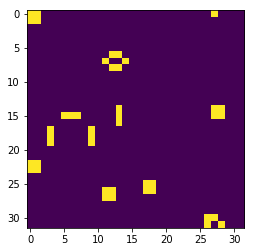

In [8]:
conway_ker = ker.get_function("conway_ker")
if __name__ == '__main__':
 # set lattice size
 N = 32
 lattice = np.int32( np.random.choice([1,0], N*N, p=[0.25, 0.75]).reshape(N, N) )
 lattice_gpu = gpuarray.to_gpu(lattice)
 conway_ker(lattice_gpu, np.int32(1000000), grid=(1,1,1), block=(32,32,1))
 fig = plt.figure(1)
 plt.imshow(lattice_gpu.get())

In [9]:
import pycuda.autoinit
import pycuda.driver as drv
from pycuda import gpuarray
from pycuda.compiler import SourceModule
import numpy as np
import matplotlib.pyplot as plt 
from time import time

In [14]:
shared_ker = SourceModule("""    
#define _iters 1000000                       
#define _X  ( threadIdx.x + blockIdx.x * blockDim.x )
#define _Y  ( threadIdx.y + blockIdx.y * blockDim.y )
#define _WIDTH  ( blockDim.x * gridDim.x )
#define _HEIGHT ( blockDim.y * gridDim.y  )
#define _XM(x)  ( (x + _WIDTH) % _WIDTH )
#define _YM(y)  ( (y + _HEIGHT) % _HEIGHT )
#define _INDEX(x,y)  ( _XM(x)  + _YM(y) * _WIDTH )
// return the number of living neighbors for a given cell                
__device__ int nbrs(int x, int y, int * in)
{
     return ( in[ _INDEX(x -1, y+1) ] + in[ _INDEX(x-1, y) ] + in[ _INDEX(x-1, y-1) ] \
                   + in[ _INDEX(x, y+1)] + in[_INDEX(x, y - 1)] \
                   + in[ _INDEX(x+1, y+1) ] + in[ _INDEX(x+1, y) ] + in[ _INDEX(x+1, y-1) ] );
}
__global__ void conway_ker_shared(int * glob_lattice, int iters)
{
   // x, y are the appropriate values for the cell covered by this thread
   int x = _X, y = _Y;
   __shared__ int lattice[32*32];
   
   
   lattice[_INDEX(x,y)] = glob_lattice[_INDEX(x,y)];
   __syncthreads();
   for (int i = 0; i < iters; i++)
   {
   
       // count the number of neighbors around the current cell
       int n = nbrs(x, y, lattice);
       
       int cell_value;
                       
        
        // if the current cell is alive, then determine if it lives or dies for the next generation.
        if ( lattice[_INDEX(x,y)] == 1)
           switch(n)
           {
              // if the cell is alive: it remains alive only if it has 2 or 3 neighbors.
              case 2:
              case 3: cell_value = 1;
                      break;
              default: cell_value = 0;                   
           }
        else if( lattice[_INDEX(x,y)] == 0 )
             switch(n)
             {
                // a dead cell comes to life only if it has 3 neighbors that are alive.
                case 3: cell_value = 1;
                        break;
                default: cell_value = 0;         
             }
             
        __syncthreads();
        lattice[_INDEX(x,y)] = cell_value;
        __syncthreads();
         
    }
             
    __syncthreads();
    glob_lattice[_INDEX(x,y)] = lattice[_INDEX(x,y)];
    __syncthreads();
         
}
""")


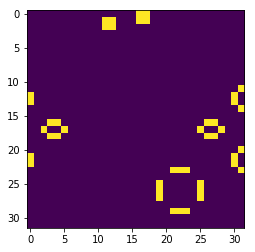

0.000205993652344


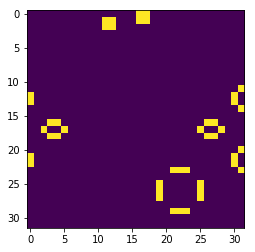

0.000265121459961


In [18]:
conway_ker_shared = shared_ker.get_function("conway_ker_shared")
conway_ker = ker.get_function("conway_ker")
if __name__ == '__main__':
    # set lattice size
    N = 32    
    lattice = np.int32( np.random.choice([1,0], N*N, p=[0.25, 0.75]).reshape(N, N) )
    lattice_gpu = gpuarray.to_gpu(lattice)
    lattice_gpu_shared = gpuarray.to_gpu(lattice)
    t1=time()
    conway_ker_shared(lattice_gpu, np.int32(1000000), grid=(1,1,1), block=(32,32,1))      
    t2 = time()
    fig = plt.figure(1)
    plt.imshow(lattice_gpu.get())
    plt.show()
    print(t2-t1)
    t3=time()
    conway_ker(lattice_gpu_shared, np.int32(1000000), grid=(1,1,1), block=(32,32,1))
    t4 = time()
    plt.imshow(lattice_gpu_shared.get())
    plt.show()
    print(t4-t3)
    ### Compare shared and global memory
    #First result is shared second is using global

In [100]:
import pycuda.autoinit
import pycuda.driver as drv
import numpy as np
from pycuda import gpuarray
from pycuda.compiler import SourceModule
from time import time
# this is a naive parallel prefix-sum kernel that uses shared memory
naive_ker = SourceModule("""
__global__ void naive_prefix(double *vec, double *out)
{
     __shared__ double sum_buf[1024];     
     int tid = threadIdx.x;     
     sum_buf[tid] = vec[tid];
     
     // begin parallel prefix sum algorithm
     
     int iter = 1;
     for (int i=0; i < 10; i++)
     {
         __syncthreads();
         if (tid >= iter )
         {
             sum_buf[tid] = sum_buf[tid] + sum_buf[tid - iter];            
         }
         
         iter *= 2;
     }
         
    __syncthreads();
    out[tid] = sum_buf[tid];
    __syncthreads();
        
}
""")

In [101]:
naive_gpu = naive_ker.get_function("naive_prefix")
if __name__ == '__main__':
    
    
    testvec = np.random.randn(1024).astype(np.float64)
    testvec_gpu = gpuarray.to_gpu(testvec)
    
    outvec_gpu = gpuarray.empty_like(testvec_gpu)

    naive_gpu( testvec_gpu , outvec_gpu, block=(1024,1,1), grid=(1,1,1))
    
    total_sum = sum( testvec)
    total_sum_gpu = outvec_gpu[-1].get()
    print(total_sum_gpu, total_sum)
    print "Does our kernel work correctly? : {}".format(np.allclose(total_sum_gpu , total_sum) )

(array(-72.58195917644991), -72.581959176449857)
Does our kernel work correctly? : True


In [5]:
import pycuda.autoinit
import pycuda.driver as drv
import numpy as np
from pycuda import gpuarray
from pycuda.compiler import SourceModule
from time import time
# this is a naive parallel prefix-sum kernel that uses shared memory
naive_ker_int = SourceModule("""
__global__ void naive_prefix_int(int *vec, int *out)
{
     __shared__ int sum_buf[512];     
     int tid = threadIdx.x;     
     sum_buf[tid] = vec[tid];
     
     // begin parallel prefix sum algorithm
     
     int iter = 1;
     for (int i=0; i < 9; i++)
     {
         __syncthreads();
         if (tid >= iter )
         {
             sum_buf[tid] = sum_buf[tid] + sum_buf[tid - iter];            
         }
         
         iter *= 2;
     }
        
    __syncthreads();
    out[tid] = sum_buf[tid];
    __syncthreads();
        
}
""")

In [6]:
N = 512
naive_gpu = naive_ker_int.get_function("naive_prefix_int")
testvec2 = np.array(range(1,N+1),dtype=np.intc)
testvec2_gpu = gpuarray.to_gpu(testvec2)
outvec2_gpu = gpuarray.empty_like(testvec2_gpu)
t1=time()
naive_gpu( testvec2_gpu , outvec2_gpu, block=(N,1,1), grid=(1,1,1))
t2=time()
t3=time()
total_sum = sum(testvec2)
t4=time()
def sequential_integer_sum(x):
    N=len(x)
    return(N*(N+1)/2)
t5 = time()
total_sum2 = sequential_integer_sum(testvec2)
t6 = time()
total_sum_gpu2 = outvec2_gpu[-1].get()
print(outvec2_gpu.get()[-5])
print(total_sum, total_sum_gpu2, total_sum2)
if( total_sum_gpu2 == total_sum2 and total_sum2 == total_sum):
    print("GPU time: {:.8f}, CPU time sum: {:.8f} , Sum using integer summation: {:.8f}".format((t2-t1),(t4-t3),(t6-t4)))


129286
(131328, array(131328, dtype=int32), 131328)
GPU time: 0.00057292, CPU time sum: 0.00052190 , Sum using integer summation: 0.00045514


In [7]:
testvec2[-1]

512

In [3]:
from __future__ import division
import pycuda.autoinit
import pycuda.driver as drv
import numpy as np
from pycuda import gpuarray
from pycuda.compiler import SourceModule
from time import time

In [25]:
up_ker = SourceModule("""
__global__ void up_ker(double *x, double *x_old, int k )
{
     int tid =  blockIdx.x*blockDim.x + threadIdx.x;
     
     int _2k = 1 << k;
     int _2k1 = 1 << (k+1);
     
     int j = tid* _2k1;
     printf("I am  thread: %d in iteration %d , and my j is: %d \\n", tid, k , j);
     x[j + _2k1 - 1] = x_old[j + _2k -1 ] + x_old[j + _2k1 - 1];
}
""")

up_gpu = up_ker.get_function("up_ker")

In [11]:
def up_sweep(x):
    # let's typecast to be safe.
    x = np.float64(x)
    x_gpu = gpuarray.to_gpu(np.float64(x) )
    x_old_gpu = x_gpu.copy()
    for k in range( int(np.log2(x.size) ) ) : 
        num_threads = int(np.ceil( x.size / 2**(k+1)))
        grid_size = int(np.ceil(num_threads / 32))
        
        if grid_size > 1:
            block_size = 32
        else:
            block_size = num_threads
            
        up_gpu(x_gpu, x_old_gpu, np.int32(k)  , block=(block_size,1,1), grid=(grid_size,1,1))
        x_old_gpu[:] = x_gpu[:]
        
    x_out = x_gpu.get()
    return(x_out)

In [16]:
down_ker = SourceModule("""
__global__ void down_ker(double *y, double *y_old,  int k)
{
     int tid =  blockIdx.x*blockDim.x + threadIdx.x;
     
     int _2k = 1 << k;
     int _2k1 = 1 << (k+1);
     
     int j = tid*_2k1;
     
     y[j + _2k - 1 ] = y_old[j + _2k1 - 1];
     y[j + _2k1 - 1] = y_old[j + _2k1 - 1] + y_old[j + _2k - 1];
}
""")

down_gpu = down_ker.get_function("down_ker")

In [17]:
def down_sweep(y):
    y = np.float64(y)
    y[-1] = 0
    y_gpu = gpuarray.to_gpu(y)
    y_old_gpu = y_gpu.copy()
    for k in reversed(range(int(np.log2(y.size)))):
        num_threads = int(np.ceil( y.size / 2**(k+1)))
        grid_size = int(np.ceil(num_threads / 32))
        
        if grid_size > 1:
            block_size = 32
        else:
            block_size = num_threads
            
        down_gpu(y_gpu, y_old_gpu, np.int32(k), block=(block_size,1,1), grid=(grid_size,1,1))
        y_old_gpu[:] = y_gpu[:]
    y_out = y_gpu.get()
    return(y_out)

In [18]:
def efficient_prefix(x):
        return(down_sweep(up_sweep(x)))

In [19]:
testvec = np.float64(range(16))
testvec_gpu = gpuarray.to_gpu(testvec)
outvec_gpu = gpuarray.empty_like(testvec_gpu) 
prefix_sum = np.roll(np.cumsum(testvec), 1)
prefix_sum_gpu = efficient_prefix(testvec)
#print "Does our work-efficient prefix work? {}".format(np.allclose(prefix_sum_gpu, prefix_sum))
print(testvec)
print(prefix_sum_gpu)
print(prefix_sum)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
[  0.   0.   1.   3.   6.  10.  15.  21.  28.  36.  45.  55.  66.  78.
  91. 105.]
[120.   0.   1.   3.   6.  10.  15.  21.  28.  36.  45.  55.  66.  78.
  91. 105.]


In [11]:
range(16)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [26]:
print(up_sweep(testvec))
drv.Context.synchronize()

[  0.   1.   2.   6.   4.   9.   6.  28.   8.  17.  10.  38.  12.  25.
  14. 120.]


In [28]:
for k in range( int(np.log2(testvec.size) ) ):
    print(k)
    num_threads = int(np.ceil( testvec.size / 2**(k+1)))
    print(num_threads)
    grid_size = int(np.ceil(num_threads / 32))
    print(grid_size)
    if grid_size > 1:
        block_size = 32
    else:
        block_size = num_threads
    print(block_size)
    print("")

0
8
1
8

1
4
1
4

2
2
1
2

3
1
1
1



In [24]:
testvec.size

16

In [14]:
import pycuda
import pycuda.driver as drv
import pycuda.autoinit
from pycuda import gpuarray
from pycuda.compiler import SourceModule
import numpy as np